# Artificial Neural Network (ANN) Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# นำเข้าข้อมูล

In [2]:
# โหลดข้อมูลจากไฟล์ CSV
data = pd.read_csv('DataComsci.csv')  # อ่านข้อมูลจากไฟล์ CSV

# ดูตัวอย่างข้อมูล
print(data.describe())

print(data.columns.tolist())

data

       GRADUATEYEAR     STUDENTID  GPAgraduate
count    343.000000  3.430000e+02   343.000000
mean    2564.303207  1.002616e+08     2.610554
std        1.389672  1.621539e+04     0.413158
min     2562.000000  1.002056e+08     2.000000
25%     2563.000000  1.002492e+08     2.310000
50%     2564.000000  1.002611e+08     2.540000
75%     2566.000000  1.002712e+08     2.815000
max     2566.000000  1.002872e+08     3.970000
['GRADUATEYEAR', 'STUDENTID', 'CalculusforScience', 'FundamentalsOfProgramming', 'HistoryAndDevelopmentOfComputerTechnology', 'MathematicsForScience', 'ObjectOrientedProgramming', 'ThaiLanguageSkills', 'PoliticsEconomyandSociety', 'PhilosophyOfScience', 'ManAndEnvironment', 'LifeSkills', 'LanguageSocietyAndCulture', 'EnglishCriticalReadingForEffectiveCommunication', 'ComputerArchitecture', 'DataStructure', 'DatabaseSystems', 'DiscreteMathematicsForComputerScience', 'LinearAlgebraAndApplications', 'OperatingSystems', 'StatisticalAnalysis', 'EnglishWritingForEffectiveCommu

,GRADUATEYEAR,STUDENTID,CalculusforScience,FundamentalsOfProgramming,HistoryAndDevelopmentOfComputerTechnology,MathematicsForScience,ObjectOrientedProgramming,ThaiLanguageSkills,PoliticsEconomyandSociety,PhilosophyOfScience,...,IntroductionToRobotics,LifeAndHealth,LifePrivacy,MultimediaApplicationDevelopment,MusicStudiesInThaiCulture,ProgrammingLanguages,Seminar,SpecialTopicsInComputerScience,SystemAnalysisAndDesign,GPAgraduate
0,2562,100205568,D+,B+,NaN,C+,D,C+,C,C+,...,NaN,NaN,NaN,NaN,NaN,D,B,NaN,C+,2.10
1,2562,100205606,D,B+,NaN,D+,D,C,NaN,C+,...,NaN,B+,NaN,NaN,C,D,C+,NaN,C,2.00
2,2564,100215265,F,B,NaN,D+,D+,C,C+,C+,...,NaN,NaN,NaN,NaN,NaN,D,B,C+,C,2.01
3,2562,100225543,F,C+,NaN,F,D,C+,NaN,C+,...,NaN,NaN,NaN,B,B+,D,B,C,C+,2.10
4,2565,100225544,F,C+,NaN,F,C,B,NaN,C+,...,B,NaN,NaN,NaN,C+,C,B,NaN,C,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2566,100282344,D,D+,A,D,D,NaN,NaN,NaN,...,NaN,A,NaN,NaN,NaN,NaN,A,NaN,D+,2.34
339,2566,100282356,C+,C,A,A,B+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,NaN,A,NaN,B+,3.19
340,2566,100282359,C,C,A,D+,C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,NaN,A,NaN,C+,2.68
341,2566,100282360,D,C,A,D,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,C,2.52


# ขั้นตอนที่ 1: เตรียมข้อมูล

In [3]:
# แปลงเกรดเป็นค่าตัวเลข
grade_mapping = {'A': 4.0, 'B+': 3.5, 'B': 3.0, 'C+': 2.5, 'C': 2.0, 'D+': 1.5, 'D': 1.0, 'F': 0.0}
data.replace(grade_mapping, inplace=True)

# แทนค่าที่หายไปด้วยค่าเฉลี่ยของแต่ละคอลัมน์สำหรับคอลัมน์ตัวเลข
data.fillna(data.mean(numeric_only=True), inplace=True)

# เลือกฟีเจอร์ที่เกี่ยวข้อง (รายวิชาที่จะใช้ทำนาย GPA)
features = [
        'CalculusforScience', 'FundamentalsOfProgramming', 'HistoryAndDevelopmentOfComputerTechnology',
        'MathematicsForScience', 'ObjectOrientedProgramming', 'ThaiLanguageSkills',
        'PoliticsEconomyandSociety', 'PhilosophyOfScience', 'ManAndEnvironment',
        'LifeSkills', 'LanguageSocietyAndCulture', 'EnglishCriticalReadingForEffectiveCommunication',
        'ComputerArchitecture', 'DataStructure', 'DatabaseSystems',
        'DiscreteMathematicsForComputerScience', 'LinearAlgebraAndApplications',
        'OperatingSystems', 'StatisticalAnalysis', 'EnglishWritingForEffectiveCommunication',
        'AlgorithmDesignandAnalysis', 'ArtificialIntelligence', 'ComputerNetworkAndDataCommunication',
        'Seminar', 'SoftwareEngineering', 'DataMiningTechniques', 
        'MobileApplicationDevelopment', 'MultimediaAnd WebTechnology', 
        'SensingAndActuationForInternetOfThings','SystemAnalysisAndDesign'
]  # แทนที่ด้วยรายชื่อฟีเจอร์ที่คุณต้องการ

X = data[features]  # สร้าง DataFrame สำหรับฟีเจอร์

# แปลงฟีเจอร์ที่เป็นประเภทข้อความ (categorical) ถ้ามี
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    # ลบค่า NaN และตรวจสอบให้แน่ใจว่าคอลัมน์มีประเภทข้อมูลเป็นข้อความอย่างเดียว
    if X[col].isnull().all():  # ตรวจสอบว่าคอลัมน์เป็น NaN ทั้งหมด
        continue
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # แปลงเป็นสตริงเพื่อหลีกเลี่ยงประเภทข้อมูลผสม
        label_encoders[col] = le

# ตัวแปรเป้าหมาย (GPA)
y = data['GPAgraduate']

### ตรวจสอบขนาดของ X และ y


In [4]:
print(X.shape)
print(y.shape)

(343, 30)
(343,)


# ขั้นตอนที่ 2: แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ

In [5]:
# แบ่งข้อมูลเป็นชุดฝึก (train) และชุดทดสอบ (test) ในสัดส่วน 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ทำการปรับมาตรฐานข้อมูล (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ขั้นตอนที่ 3: สร้างโมเดล ANN และฝึกสอน

In [6]:
model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(X_train.shape[1],)))  # เลเยอร์แรก
model.add(Dense(15, activation='relu'))  # เลเยอร์ที่สอง
model.add(Dense(1))  # เลเยอร์สุดท้าย (สำหรับการทำนาย)

# คอมไพล์โมเดล
model.compile(optimizer= Adam(learning_rate = 0.075 ), loss='mean_squared_error')

# ดูภาพรวมของโครงสร้างโมเดล
model.summary()

# ฝึกโมเดล
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_split=0.2, verbose=1)

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,181 (4.61 KB)

 Trainable params: 1,181 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7424 - val_loss: 0.9327
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5609 - val_loss: 0.2807
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1809 - val_loss: 0.1460
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0873 - val_loss: 0.1068
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0520 - val_loss: 0.1007
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0534 - val_loss: 0.0745
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0285 - val_loss: 0.0646
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0221 - val_loss: 0.0592
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 - val_loss: 0.0557
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0172 - val_loss: 0.0615
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 - val_loss: 0.0435
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

# ขั้นตอนที่ 4: ทำนายโดยใช้ชุดทดสอบ

In [7]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


# ขั้นตอนที่ 5: ประเมินผลโมเดล

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# แสดงผลลัพธ์

In [9]:
print(f'Mean Squared Error (MSE): {mse}')  # ค่าความคลาดเคลื่อนเฉลี่ย
print(f'R-squared (R^2): {r2}')  # ค่าความแม่นยำของโมเดล
print('')

# แสดงค่า weights ของทุกเลเยอร์ในโมเดล ANN
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()  # ดึงค่า weights ของเลเยอร์
    print(f"Layer {i + 1} Weights:")
    print(weights[0])  # ค่า weights
    print("Biases:")
    print(weights[1])  # ค่า biases

Mean Squared Error (MSE): 0.012532195528086319
R-squared (R^2): 0.9043675358944103

Layer 1 Weights:
[[-5.76147139e-02  3.19718093e-01 -3.67116570e-01 -5.90371072e-01
  -5.33981562e-01 -1.18811280e-01 -3.43545854e-01 -5.02896726e-01
   2.13830441e-01  1.57421783e-01 -6.22949116e-02  5.09686053e-01
   1.66839287e-02  1.93884507e-01  2.65216511e-02  7.86628067e-01
  -6.00793839e-01  4.80916381e-01 -4.13691066e-02  1.26108751e-01
  -3.99051994e-01  6.11937106e-01 -3.15148458e-02 -1.92520127e-01
  -3.97687554e-01]
 [ 2.26113945e-01  8.49028155e-02 -3.49699020e-01 -3.99683475e-01
   1.93967447e-01 -2.57508069e-01  1.31842904e-02 -4.41623814e-02
   3.22268605e-01 -4.28935111e-01  2.67396830e-02  3.08874756e-01
   1.95422530e-01  1.29852927e+00 -1.62899062e-01 -1.62722304e-01
  -3.78985286e-01  1.95394918e-01 -1.95194870e-01 -4.96878996e-02
  -1.66381806e-01 -4.77850169e-01  1.40938342e-01 -3.26669186e-01
  -8.11330602e-02]
 [-5.63900888e-01 -5.65136969e-01 -3.37401390e-01  4.17486101e-01
  -

# กราฟแสดงผล

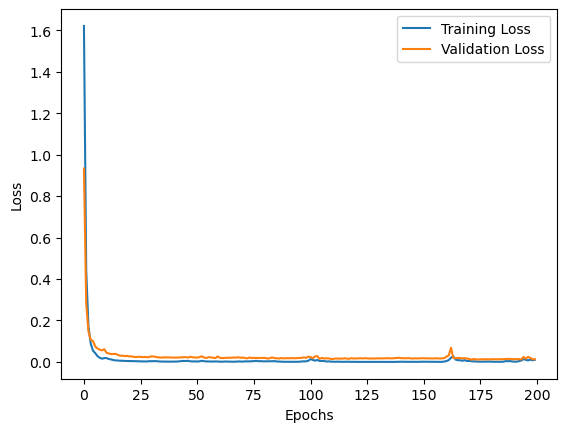

In [10]:
# สร้างกราฟแสดงการฝึกโมเดล
plt.plot(history.history['loss'], label='Training Loss')  # Loss ในชุดฝึก
plt.plot(history.history['val_loss'], label='Validation Loss')  # Loss ในชุดทดสอบ
plt.xlabel('Epochs')  # ชื่อแกน X
plt.ylabel('Loss')  # ชื่อแกน Y
plt.legend()  # เพิ่มคำอธิบายกราฟ
plt.show()  # แสดงกราฟ